## Setting Up NLTK

In [1]:
import nltk

In [2]:
nltk.download()
#download all files ( check the directory it downloads)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
# check that downloading completed 
from nltk.corpus import brown # corpus shows the difference between different genres 


In [4]:
brown.words() # gives list of available words in the genre 

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

## Reading in NLTK Corpora

In [5]:
from nltk.book import * # imports entire module 

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [6]:
# exploring brown corpus 

from nltk.corpus import brown 
brown.categories() #load different genres

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [7]:
review_words = brown.words(categories='reviews')
review_words 

['It', 'is', 'not', 'news', 'that', 'Nathan', ...]

In [8]:
len(review_words)

40704

# Text Extraction & Pre-Processing 

### Tokenisation: The process of placing unquie symbols of identification in its place to retain all the essential information 

It is a process of breaking running streams of text in words and sentences
It works by segregating words using spaces and punctuation

Text Extraction & Pre-processing: N-grams
    
        Ngrams: 
            Is a simple language model that assigns probabilities to sequence of words and sentences 
            They are combiantions of adjacent words or letters of length 'n' in the source text.
            
            
            Very helpful in text mining when it is required to extract patterns from the text.

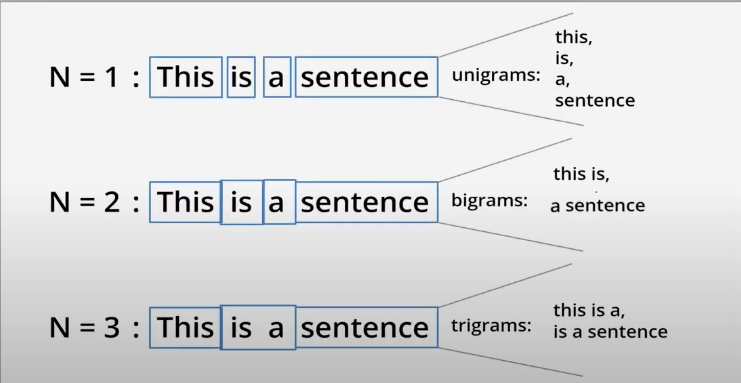

### Stop Words & Removal: 
    
    Stop words are natural language words which have very little meaning e.g "a", "an", "and", "or", "the"
    These words will take up space in the database and increase the processing time. 
    They can be removed by sorting a list of stop words.
  
  
  Stop words are filtered out before processing natural language daat as they don't reveal much information 

In [9]:
from nltk.corpus import stopwords
set(stopwords.words('english')) #set language 

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [11]:
# filtring out example

from nltk.tokenize import word_tokenize

example_sent = "an Apple a day keep the diseases at bay."

stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(example_sent)

filtered_sen = [w for w in word_tokens  if not w in stop_words]
filtered_sen = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sen.append(w)


print(filtered_sen)

['Apple', 'day', 'keep', 'diseases', 'bay', '.']


### Stemming:  it is used to reduce a word to stem or base(root) form by removing suffixes

such as helps, helping and helper to the word help.

There are a numeber of stemming algorithms:
                            
                         - Porter Stemmer 
                         - Lancster Stemmer
                         - Snowball Stemmer 
                    

In [13]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize
ps = PorterStemmer()

new_text = "importantance of caving, explained by cavers"

words = word_tokenize(new_text)
for w in words:
    print(ps.stem(w))

important
of
cave
,
explain
by
caver


### Lemmatisation: is a method for grouping the various inflected types of a word so that they can be analysed as one item 


Lemmatisation uses vocablists and POS of a word to get to the root 
it uses word net database that has English words that are linked together by their semantic realtionships 

In [15]:
from nltk.stem import WordNetLemmatizer 

lemmat = WordNetLemmatizer()

print(lemmat.lemmatize("feet"))
print(lemmat.lemmatize("pineapples"))
print(lemmat.lemmatize("geese"))



#without a POS tag, the lemmat assumes everything is a noun
print(lemmat.lemmatize("loving"))
print(lemmat.lemmatize("loving", 'v')) # with POS tag

foot
pineapple
goose
loving
love


### POS Tagging: part-of-speech teagging
It is a special label assigned to each token or word in the corpus to a corresponding part of a speech tag based on its context and defintion.

Also other grammatical categories such as tense, pluarl or singular, case etc

